###### Import libraries

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, Birch, AffinityPropagation, MeanShift, OPTICS, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

###### Load the data

In [2]:
# Load the loan dataset
X_train = pd.read_csv("raw_data\X_train.csv")
# X_test = pd.read_csv("raw_data\X_test.csv")

###### Check the shape and size of the data

In [3]:
print('The shape of X_train is:', X_train.shape)
print('The size of X_train is:', X_train.size)

The shape of X_train is: (1199861, 45)
The size of X_train is: 53993745


###### Check the data types of the variables

In [4]:
print('The data types of X_train are:\n', X_train.dtypes)

The data types of X_train are:
 index                           int64
acc_now_delinq                float64
addr_state                     object
annual_inc                    float64
chargeoff_within_12_mths      float64
collections_12_mths_ex_med    float64
delinq_2yrs                   float64
dti                           float64
earliest_cr_line               object
emp_length                     object
fico_range_high               float64
fico_range_low                float64
funded_amnt                   float64
home_ownership                 object
inq_last_12m                  float64
installment                   float64
int_rate                       object
issue_d                        object
loan_amnt                     float64
mort_acc                      float64
mths_since_last_delinq        float64
mths_since_recent_bc_dlq      float64
mths_since_recent_inq         float64
num_accts_ever_120_pd         float64
num_actv_bc_tl                float64
num_rev_accts     

###### Check the summary statistics of the numerical variables

In [5]:
print('The summary statistics of X_train are:\n', X_train.describe())

The summary statistics of X_train are:
               index  acc_now_delinq    annual_inc  chargeoff_within_12_mths  \
count  1.199861e+06    1.199861e+06  1.199861e+06              1.199824e+06   
mean   5.999300e+05    4.625536e-03  7.811051e+04              8.901306e-03   
std    3.463702e+05    7.284156e-02  1.363514e+05              1.081550e-01   
min    0.000000e+00    0.000000e+00  2.300000e+03              0.000000e+00   
25%    2.999650e+05    0.000000e+00  4.700000e+04              0.000000e+00   
50%    5.999300e+05    0.000000e+00  6.500000e+04              0.000000e+00   
75%    8.998950e+05    0.000000e+00  9.300000e+04              0.000000e+00   
max    1.199860e+06    6.000000e+00  1.100000e+08              1.000000e+01   

       collections_12_mths_ex_med   delinq_2yrs           dti  \
count                1.199824e+06  1.199861e+06  1.199861e+06   
mean                 1.810182e-02  3.142264e-01  1.803875e+01   
std                  1.507312e-01  8.763691e-01  8.40

###### Check the frequency counts of the categorical variables

In [6]:
print('The frequency counts of X_train are:\n', X_train.value_counts())

The frequency counts of X_train are:
 index    acc_now_delinq  addr_state  annual_inc  chargeoff_within_12_mths  collections_12_mths_ex_med  delinq_2yrs  dti    earliest_cr_line  emp_length  fico_range_high  fico_range_low  funded_amnt  home_ownership  inq_last_12m  installment  int_rate  issue_d   loan_amnt  mort_acc  mths_since_last_delinq  mths_since_recent_bc_dlq  mths_since_recent_inq  num_accts_ever_120_pd  num_actv_bc_tl  num_rev_accts  num_sats  num_tl_120dpd_2m  num_tl_30dpd  num_tl_90g_dpd_24m  num_tl_op_past_12m  open_acc  open_il_24m  open_rv_24m  percent_bc_gt_75  pub_rec  pub_rec_bankruptcies  purpose             revol_util  tax_liens  term        title                    total_acc  verification_status  zip_code
0        0.0             UT          80000.0     0.0                       0.0                         0.0          30.49  Oct-1996          4 years     689.0            685.0           16000.0      RENT            1.0           539.03        12.99%   Apr-2016  16

###### Check the missing values in the data

In [7]:
print('The number of missing values in X_train are:\n', X_train.isnull().sum())

The number of missing values in X_train are:
 index                              0
acc_now_delinq                     0
addr_state                         0
annual_inc                         0
chargeoff_within_12_mths          37
collections_12_mths_ex_med        37
delinq_2yrs                        0
dti                                0
earliest_cr_line                   0
emp_length                     71747
fico_range_high                    0
fico_range_low                     0
funded_amnt                        0
home_ownership                     0
inq_last_12m                  567215
installment                        0
int_rate                           0
issue_d                            0
loan_amnt                          0
mort_acc                       31541
mths_since_last_delinq        607443
mths_since_recent_bc_dlq      917196
mths_since_recent_inq         149781
num_accts_ever_120_pd          45009
num_actv_bc_tl                 45009
num_rev_accts                

###### Check the outliers in the data using boxplots

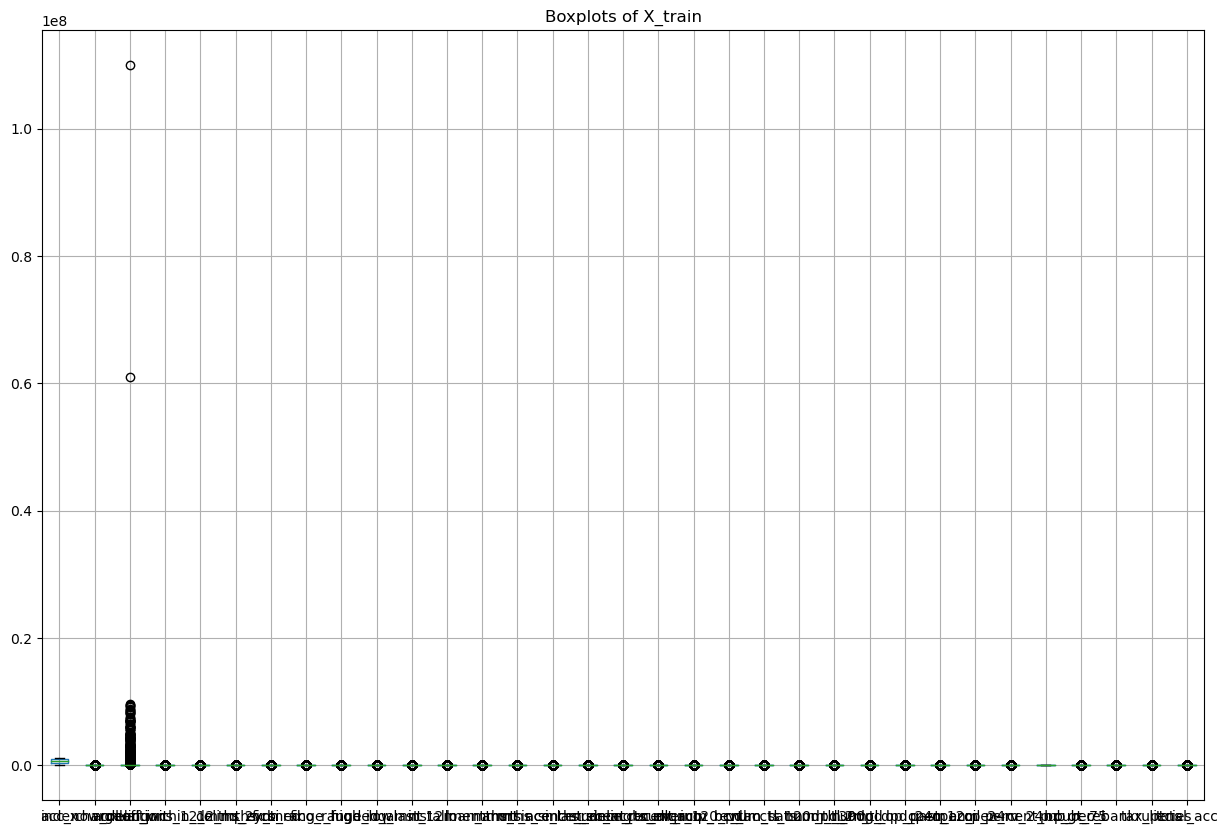

In [8]:
plt.figure(figsize=(15,10))
X_train.boxplot()
plt.title('Boxplots of X_train')
plt.show()

###### Check the correlation between the variables using heatmap

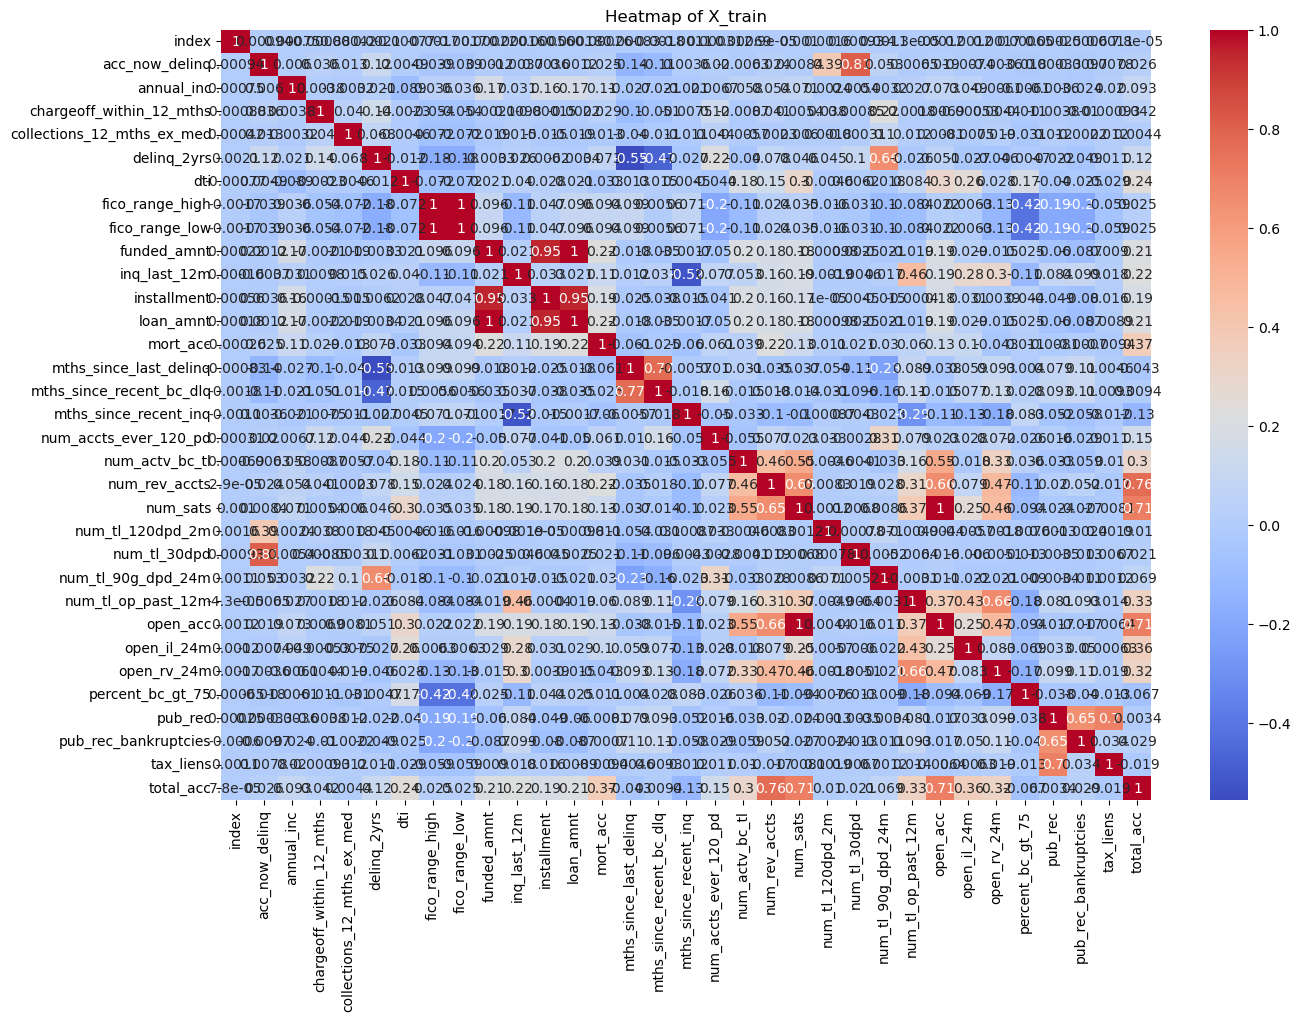

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of X_train')
plt.show()

### Create new features

###### Extract the month from issue_d

In [10]:
X_train['issue_month'] = X_train['issue_d'].apply(lambda x: int(datetime.strptime(x.split('-')[0],'%b').month))

###### Extract the year from issue_d

In [11]:
X_train['issue_year'] = X_train['issue_d'].apply(lambda x: int(datetime.strptime(x.split('-')[1],'%Y').year))

###### Calculate the loan to income ratio

In [12]:
X_train['loan_to_income'] = X_train['loan_amnt'] / X_train['annual_inc']

###### Calculate the interest paid per month

In [13]:
X_train['interest_per_month'] = X_train['installment'] - (X_train['loan_amnt'] / X_train['term'].apply(lambda x: int(x.split()[0])))

In [14]:
# X_train['revol_bal'] = X_train['credit_util'] * X_train['revol_util']

###### Calculate the credit utilization ratio

In [15]:
# X_train['credit_util_ratio'] = X_train.loc[:, 'revol_bal'] / X_train['revol_util']
# #  X_train['revol_bal']

###### Drop the original features that are no longer needed

In [16]:
X_train.drop(['issue_d', 'loan_amnt', 'annual_inc', 'installment', 'revol_util'], axis=1, inplace=True)
# 'revol_bal', 

### Handle missing values

###### Drop the columns with more than 50% missing values

In [17]:
X_train.dropna(thresh=len(X_train)*0.5, axis=1, inplace=True)

###### Impute the numerical columns with mean

In [18]:
num_imputer = SimpleImputer(strategy='mean')
# 'annual_inc', 'loan_amnt', 'revol_bal', 'revol_util'
num_cols = [ 'dti', 'fico_range_high', 'fico_range_low'] 
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])

###### Impute the categorical columns with mode

In [19]:
# Impute the categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_cols = ['addr_state', 'home_ownership', 'purpose']
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])

###### Encode categorical variables

In [20]:
le = LabelEncoder()
ord_cols = ['emp_length', 'term'] #'grade',
X_train[ord_cols] = X_train[ord_cols].apply(le.fit_transform)

###### solve : "ValueError: Columns must be same length as key"

In [21]:
# # Concatenate the one-hot encoded DataFrame with X_train
# ohe = OneHotEncoder(sparse_output=False)
# nom_cols = ['addr_state', 'home_ownership', 'purpose']
# X_train = pd.concat([X_train, ohe.fit_transform(X_train[nom_cols])], axis=1)

In [22]:
# Convert the numpy array to a pandas DataFrame
ohe = OneHotEncoder(sparse_output=False)
nom_cols = ['addr_state', 'home_ownership', 'purpose']
ohe_df = pd.DataFrame(ohe.fit_transform(X_train[nom_cols]))

In [23]:
# Concatenate the DataFrame with X_train
X_train = pd.concat([X_train, ohe_df], axis=1)

###### One-hot encode the nominal categorical variables

In [24]:
# ohe = OneHotEncoder(sparse_output=False)
# nom_cols = ['addr_state', 'home_ownership', 'purpose']
# X_train[nom_cols] = ohe.fit_transform(X_train[nom_cols])

###### Scale numerical variables

In [25]:
# Standardize the numerical variables
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

### Model Selection

###### Scale the data

In [26]:
# # throw an exception -> TypeError: Feature names are only supported if all input 
# # features have string names, but your input has ['int', 'str'] as feature name / column 
# # name types.
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

###### Define the list of clustering algorithms

In [27]:
clustering_algorithms = [
    ('K-means', KMeans(n_clusters=5)),
    ('DBSCAN', DBSCAN(eps=0.5)),
    ('Gaussian Mixture Model', GaussianMixture(n_components=5)),
    ('BIRCH', Birch(n_clusters=5)),
    ('Affinity Propagation', AffinityPropagation()),
    ('Mean-Shift', MeanShift()),
    ('OPTICS', OPTICS()),
    ('Agglomerative Hierarchy', AgglomerativeClustering(n_clusters=5)),
    ('Spectral Clustering', SpectralClustering(n_clusters=5))
]

##### Convert all input features to have string names
###### to avoid TypeError: Feature names are only supported if all input features have string 
######  names, but your input has ['int', 'str'] as feature name / column name types.

In [29]:
X_train.columns = X_train.columns.astype(str)

In [30]:
# throw an exception -> MemoryError: Unable to allocate 915. MiB for an array 
# with shape (100, 1199861) and data type float64
# Define an empty dictionary to store the results
results = {}

# Loop through the clustering algorithms
for name, algorithm in clustering_algorithms:
    # Fit the algorithm to the data
    algorithm.fit(X_train)
    
    # Predict the cluster labels
    labels = algorithm.predict(X_train)
    
    # Calculate the silhouette score
    score = silhouette_score(X_train, labels)
    
    # Store the results in the dictionary
    results[name] = score

ValueError: could not convert string to float: 'UT'

In [34]:
# ValueError: could not convert string to float: 'UT'
# search for a 'UT' in all columns of a Pandas DataFrame
mask = np.column_stack([X_train[col].astype(str).str.contains('UT', na=False) for col in X_train])
result = X_train.loc[mask.any(axis=1)]

In [36]:
X_train.columns

Index(['index', 'acc_now_delinq', 'addr_state', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'earliest_cr_line',
       'emp_length', 'fico_range_high',
       ...
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70'],
      dtype='object', length=113)